# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

#import operator   # needed to make sort work

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# keep orginal data and make a copy
mm_df = mouse_metadata
sr_df = study_results

In [5]:
# - MB
# Merge our two data frames together
combo_df = pd.merge(mm_df, sr_df, on="Mouse ID")
combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# MB -- clean the data but keep original combo_df file

combined_df = combo_df.dropna(how="any")
combined_df

# ** NOTE:  Going fwd use combined_df as the datafram to use for calculations, etc.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# code ok - done
# Checking the number of mice.

# Checking the number of mice.
num_mice = len(pd.unique(mm_df["Mouse ID"]))
print('Numnber of mice: ', num_mice)

Numnber of mice:  249


In [8]:
# keep
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#   ** Note:  Mouse result should be:  array(['g989'], dtype=object)
# Optional: Get all the data for the duplicate mouse ID. 

# Selecting duplicate rows except first  

# occurrence based on all columns 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'], keep=False)] 
  
print("Duplicate Row(s) :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Row(s) :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Checking the number of mice in the clean DataFrame.

# remove duplicates
clean_df=combined_df[combined_df['Mouse ID'] != 'g989']
clean_df['Mouse ID'].nunique()

num_mice = len(pd.unique(clean_df["Mouse ID"]))
print('Numnber of mice after removal of duplicate: ', num_mice)
print()

Numnber of mice after removal of duplicate:  248



In [10]:
# Display the 'cleaned' dataframe
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
num_drug_regimen = len(pd.unique(clean_df["Drug Regimen"]))
print('Numnber of Drug Regimen: ', num_drug_regimen)
print()

Numnber of Drug Regimen:  10



## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats_df = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                                            ['mean', 'median', 'var','std', 'sem']})
                                          
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
# for reference to get column names

clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [14]:
# for reference to get column names
summary_stats_df.columns

MultiIndex([('Tumor Volume (mm3)',   'mean'),
            ('Tumor Volume (mm3)', 'median'),
            ('Tumor Volume (mm3)',    'var'),
            ('Tumor Volume (mm3)',    'std'),
            ('Tumor Volume (mm3)',    'sem')],
           )

In [15]:
# DO NOT RUN -- DELETE???
# rename column
summary_stats_df = summary_stats_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})  
summary_stats_df

Mean Tumor Volume                                          
                          mean     median        var       std       sem
Drug Regimen                                                            
Capomulin            40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin             52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol            52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril             55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol             54.331565  52.509285  66.173479  8.134708  0.596466
Placebo              54.033581  52.288934  61.168083  7.821003  0.581331
Propriva             52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane             40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn             54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol            53.236507  51.818479  48.533355  6.966589  0.516398

In [16]:
# DO NOT RUN -- DELETE???

# add columns -- option 1

# temp = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 'mean'})  
# x_df['Mean Tumor Volume'] = temp
# temp = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 'median'})  
# x_df['Median Tumor Volume'] = temp
# temp = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 'var'})  
# x_df['Tumor Volume Variance'] = temp
# temp = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 'std'})  
# x_df['Tumor Volume Std Dev'] = temp
# temp = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 'sem'})  
# x_df['Tumor Volume Std Err'] = temp
# x_df

In [17]:
# DO NOT RUN -- DELETE???

new_df = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std', 'sem']})
                                          
new_df.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

In [18]:
# DO NOT RUN -- DELETE???

new_df.columns

MultiIndex([('Tumor Volume (mm3)',   'mean'),
            ('Tumor Volume (mm3)', 'median'),
            ('Tumor Volume (mm3)',    'var'),
            ('Tumor Volume (mm3)',    'std'),
            ('Tumor Volume (mm3)',    'sem')],
           )

In [19]:
# DO NOT RUN -- DELETE???

# Rename column labels

new_df = new_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume',  
                                'Tumor Volume (mm3)': 'Median Tumor Volume',
                                'Tumor Volume (mm3)': 'Tumor Volume Variance',
                                'Tumor Volume (mm3)': 'Tumor Volume Std. Dev',
                                'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'
                                })                      

new_df

Tumor Volume Std. Err.                                          
                               mean     median        var       std       sem
Drug Regimen                                                                 
Capomulin                 40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin                  52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol                 52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril                  55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol                  54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                   54.033581  52.288934  61.168083  7.821003  0.581331
Propriva                  52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane                  40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn                  54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol                 53.236507  51.818479  48.533355  6.966589  0.516398

In [20]:
# DO NOT TOUCH CODE ABOVE -- all cells above work!

## Bar and Pie Charts

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# NOTE:  USE clean_df 

In [22]:
num_drug_regimen = len(pd.unique(clean_df["Drug Regimen"]))
print('Numnber of Drug Regimen: ', num_drug_regimen)
print()

Numnber of Drug Regimen:  10



In [23]:
drugs = pd.unique(clean_df["Drug Regimen"])
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [24]:
#for reference only
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [25]:
#**  DO NOT RUN -- for reference only

summary_stats_df = summary_stats_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})  
summary_stats_df

new_df = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std', 'sem']})
new_df.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

In [26]:
# total number of measurements per drug
grp_by_drug_measurement = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 'count'})
grp_by_drug_measurement

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [27]:
# The following cells will be used for chart references below:

In [28]:
drugs = pd.unique(clean_df["Drug Regimen"])
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [29]:
measurements = grp_by_drug_measurement['Tumor Volume (mm3)']
measurements

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

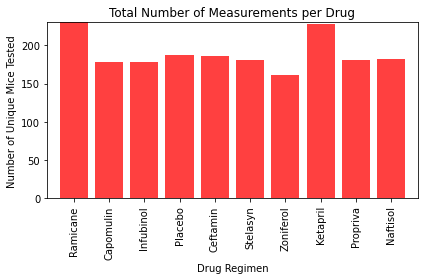

<function matplotlib.pyplot.close(fig=None)>

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#%matplotlib notebook

# -- use variables above for the charts
# x-axis will be drugs --> drugs
# y-axis will be # of measurements taken per drug regimen --> measurements

x_axis = np.arange(0, len(measurements))
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

#plt.bar(x_axis, measurements, facecolor="red", alpha=0.75, align="center")
plt.bar(x_axis, measurements, facecolor="red", alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

# pass in the tick location and the label you want to appear on the ticks (in order)
plt.xticks(tick_locations, drugs, rotation="vertical")

# Sets the x limits of the current chart
# using len(x_axis)-0.25 will go to the last value in your x-axis and come back a small amount. 
# This is based on the size of your data

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(measurements), +5)

# Set a Title and labels
plt.title("Total Number of Measurements per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

# tigh_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")
plt.show()

plt.close


In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

%matplotlib notebook

# <insert code above when it works...>


In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [41]:
# -- FINAL code
# MB -- count number of male, female mice 

temp_df = mm_df.groupby('Sex').agg({'Sex': 'count'})  
temp_df.head()

# rename column
ren_temp_df = temp_df.rename(columns={'Sex': 'Count'})                      
ren_temp_df

,Count
Sex,
Female,124
Male,125


In [42]:
# -- FINAL code
# MB -- count numb
# Display mouse count by sex -- using loc 

num_female = temp_df.loc['Female', 'Sex']
num_male = temp_df.loc['Male', 'Sex']

print("Female: ", num_female, "  Male: ", num_male)

Female:  124   Male:  125


<IPython.core.display.Javascript object>


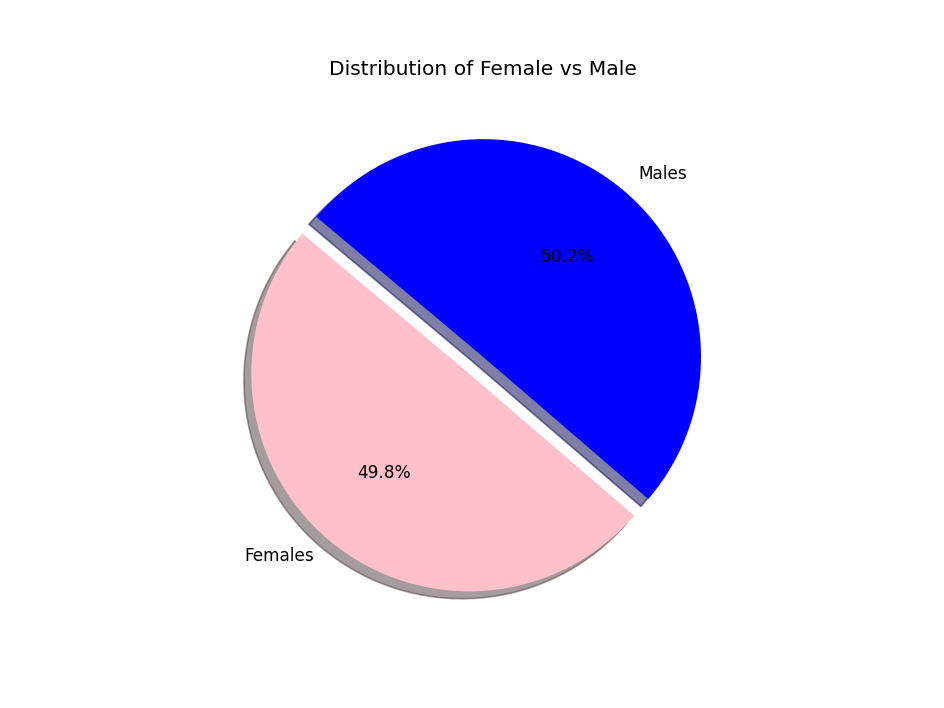

<function matplotlib.pyplot.close(fig=None)>

In [43]:
# -- FINAL -- DO NOT TOUCH
# Generate a pie plot showing the distribution of female versus male mice using pyplot

%matplotlib notebook

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The values of each section of the pie chart  -- use the variables for count of mice: female & male
sizes = [num_female, num_male]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Females" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")

# Set a Title and labels
plt.title("Distribution of Female vs Male")

plt.show()
plt.close

In [ ]:
#----------------
# for ref only
# import matplotlib
# matplotlib.axes.Axes.pie
# matplotlib.pyplot.pie
# matplotlib.axes.Axes.legend
# matplotlib.pyplot.legend


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen